In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:

df = pd.read_csv('student-mat.csv')

# View the first few rows
print(df.head())

# Check basic information
print(df.info())

# Summary statistics
print(df.describe())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Example: drop rows with any missing values (simple approach)
df.dropna(inplace=True)

# Convert yes/no columns to binary (example for 'schoolsup')
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup']    = df['famsup'].map({'yes': 1, 'no': 0})
df['paid']      = df['paid'].map({'yes': 1, 'no': 0})
df['activities']= df['activities'].map({'yes': 1, 'no': 0})
df['nursery']   = df['nursery'].map({'yes': 1, 'no': 0})
df['higher']    = df['higher'].map({'yes': 1, 'no': 0})
df['internet']  = df['internet'].map({'yes': 1, 'no': 0})
df['romantic']  = df['romantic'].map({'yes': 1, 'no': 0})

# Encode other categorical features as needed (e.g., school, Mjob, Fjob, etc.)
# Example using pd.get_dummies for 'school'
df = pd.get_dummies(df, columns=['school'], drop_first=True)


Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


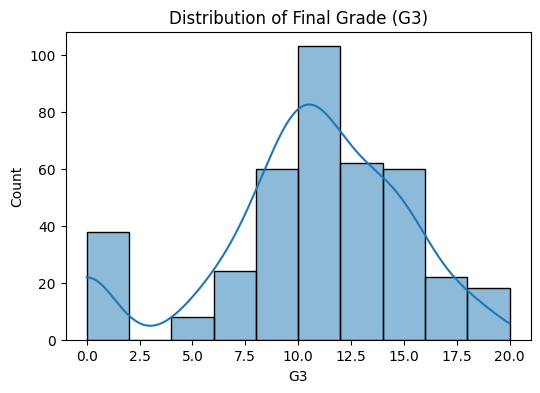

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], kde=True, bins=10)
plt.title('Distribution of Final Grade (G3)')
plt.show()


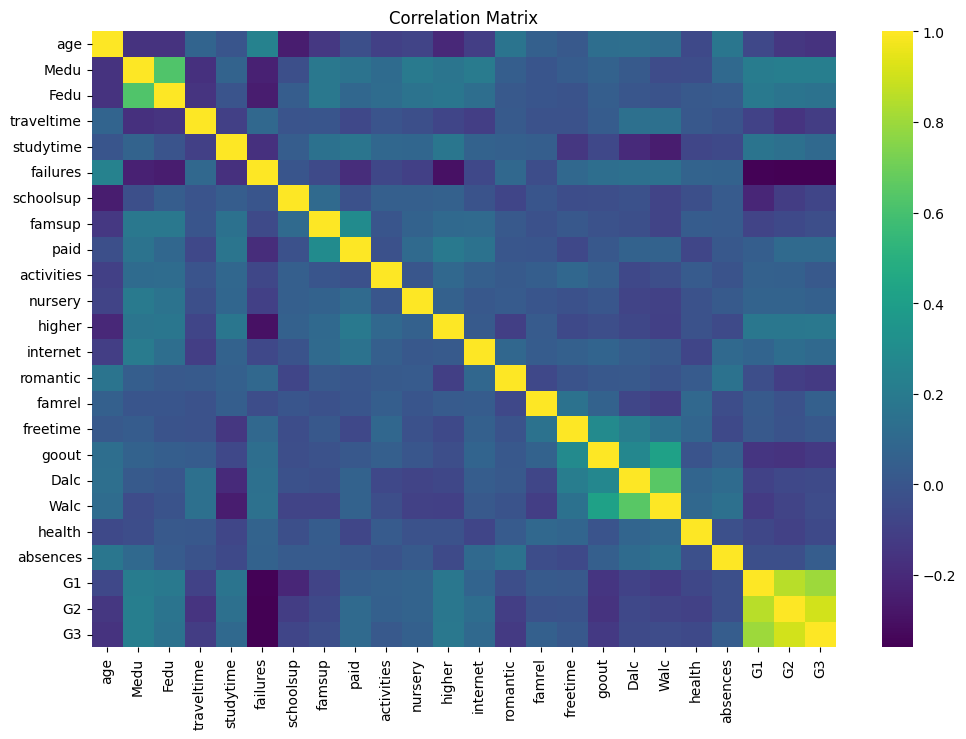

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute correlation on numeric-only DataFrame
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

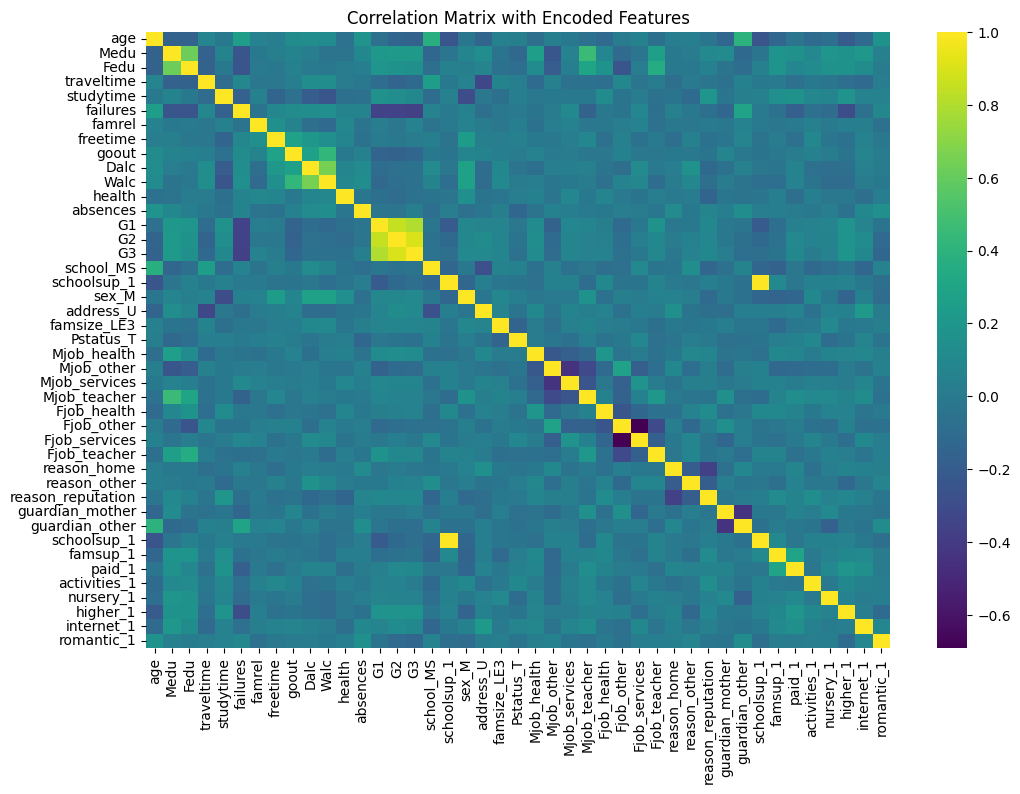

In [10]:
# Example of one-hot encoding certain columns
categorical_cols = ['schoolsup', 'sex', 'address', 'famsize', 'Pstatus', 
                    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 
                    'internet', 'romantic']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Now compute correlation on the encoded DataFrame
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Matrix with Encoded Features')
plt.show()


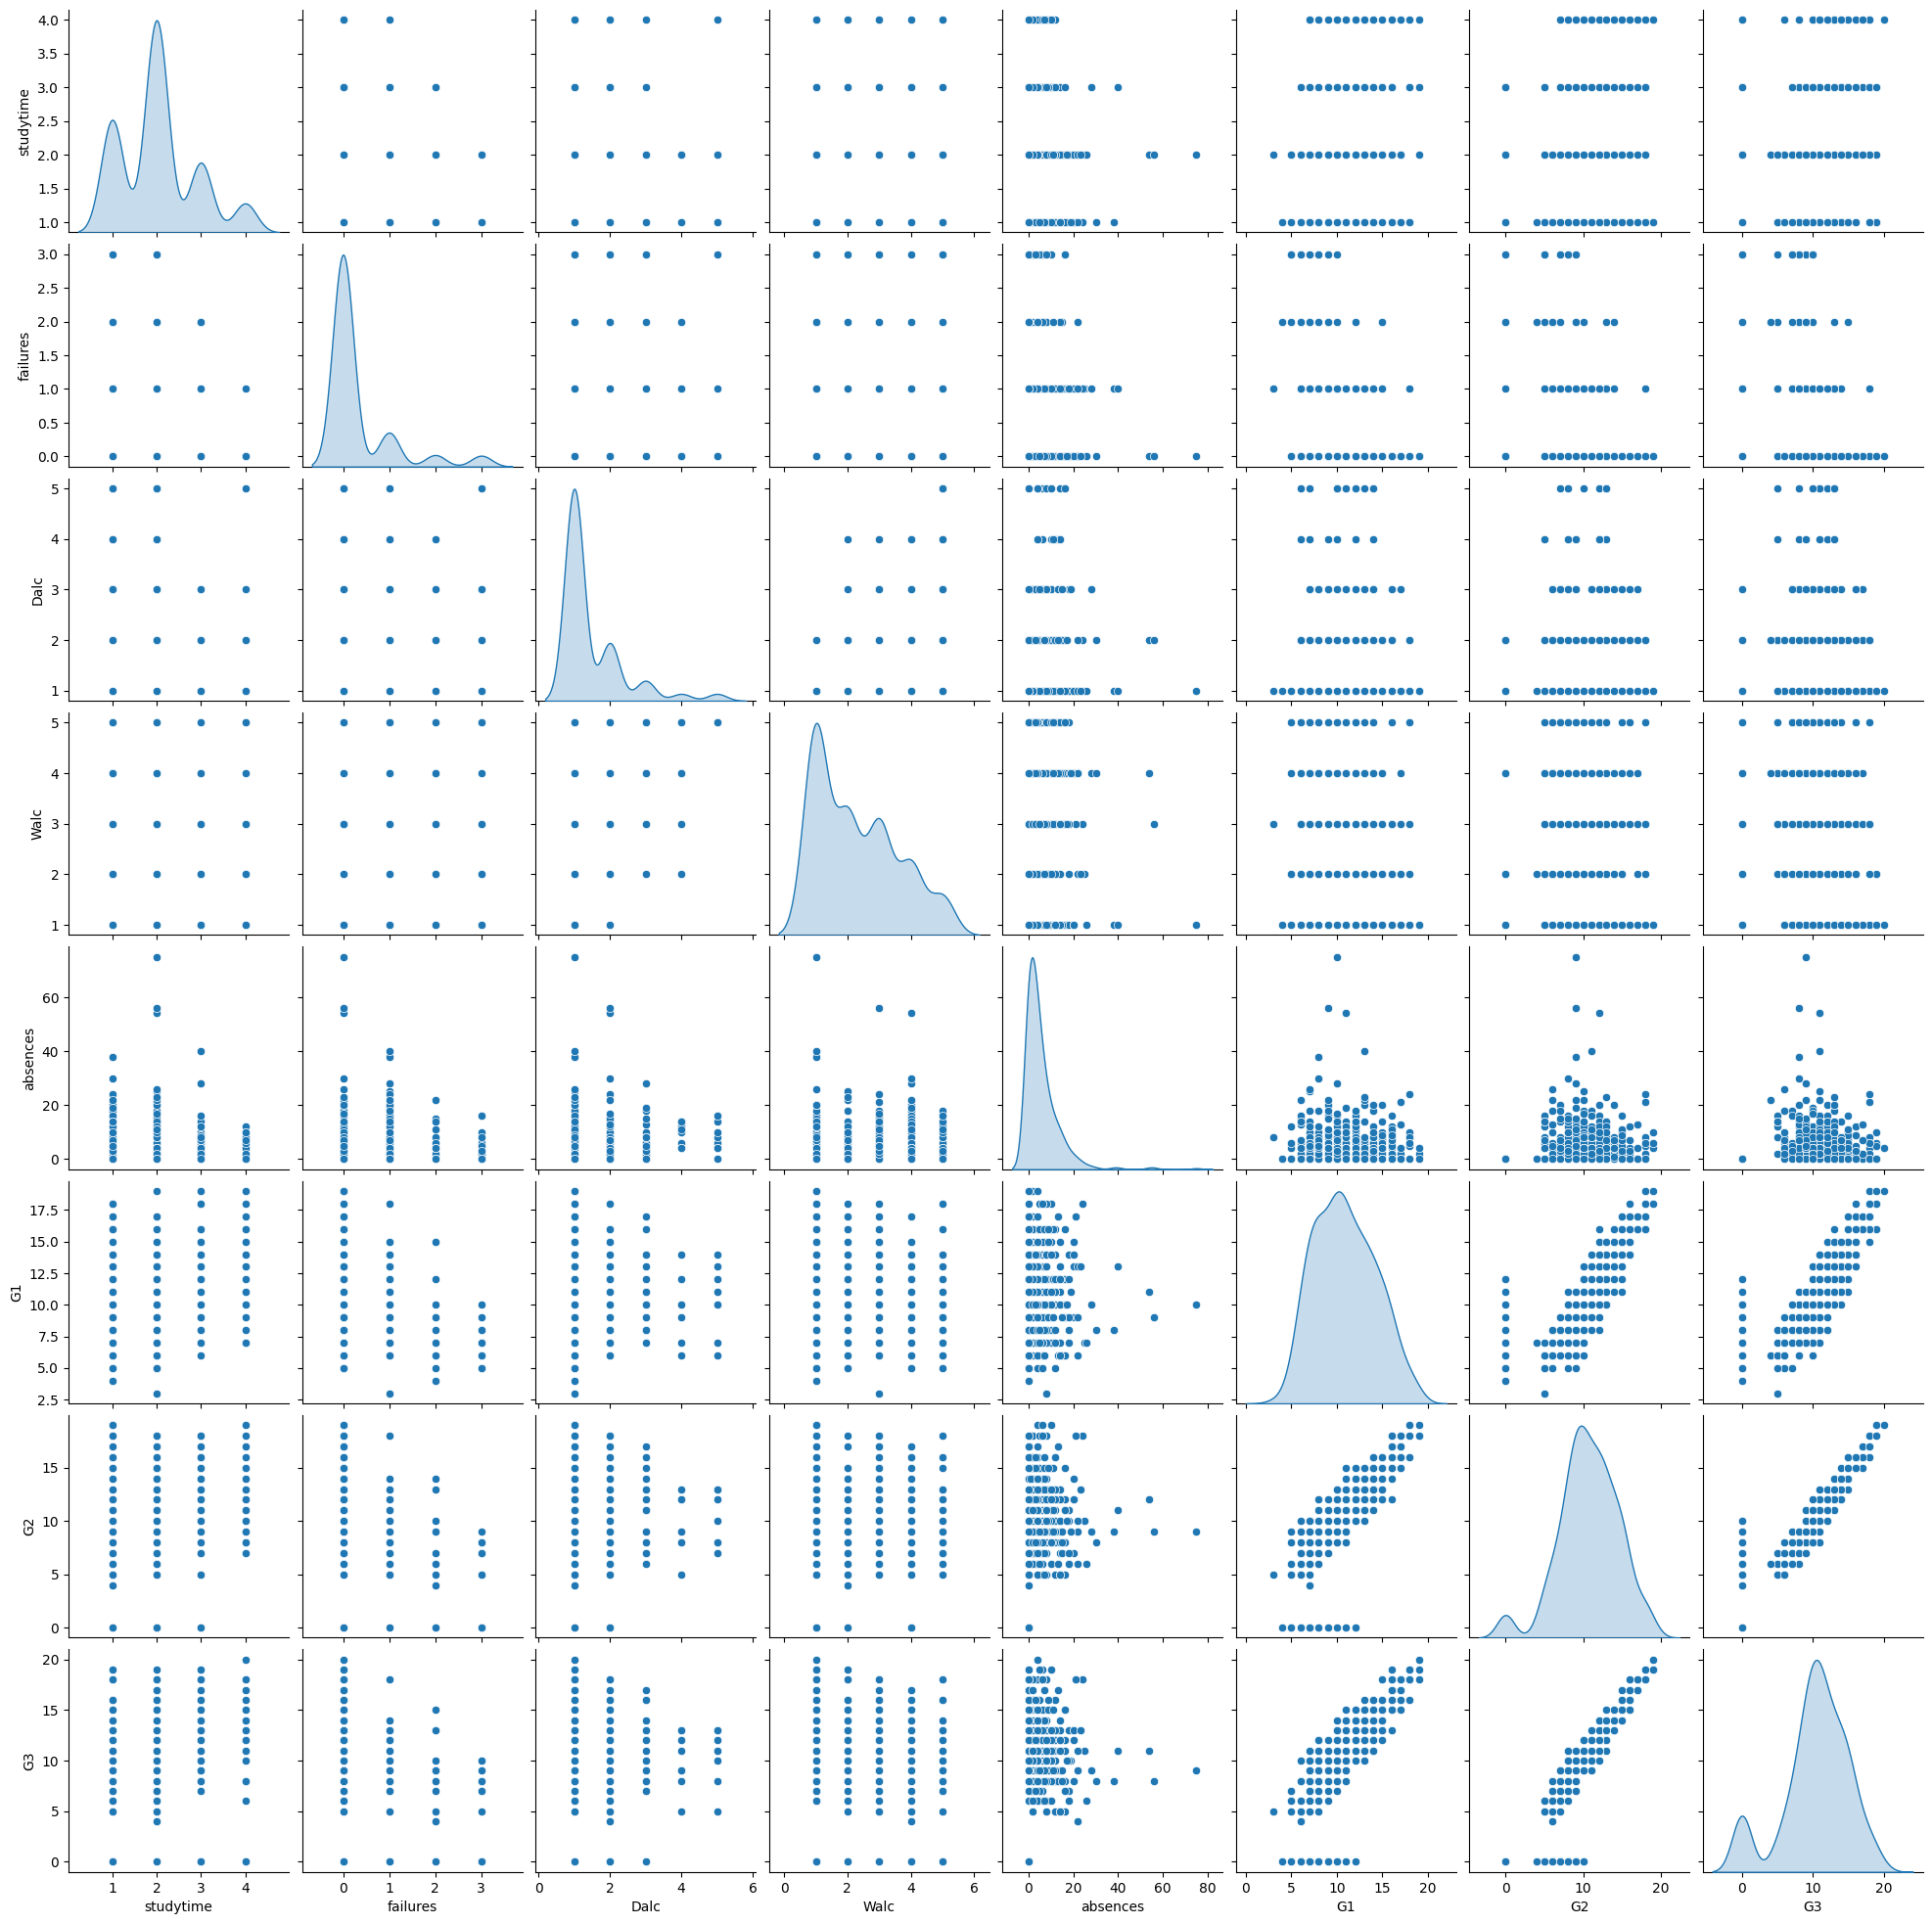

In [11]:
# This can be large, so you may limit it to a subset of columns
cols_of_interest = ['studytime', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3']
sns.pairplot(df[cols_of_interest], diag_kind='kde')
plt.show()


In [12]:
features = ['studytime', 'failures', 'absences', 'Dalc', 'Walc', 'G1', 'G2']
X = df[features]
y = df['G3']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Initialize the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2:  {r2:.2f}")


Linear Regression Model Performance:
MAE:  1.34
MSE:  4.44
RMSE: 2.11
R^2:  0.78


from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume X and y are your features and target variable respectively
# For example:
# features = ['studytime', 'failures', 'absences', 'Dalc', 'Walc', 'G1', 'G2']
# X = df[features]
# y = df['G3']

# Initialize the model
lin_reg = LinearRegression()

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute R^2 scores using cross_val_score (higher is better)
r2_scores = cross_val_score(lin_reg, X, y, cv=cv, scoring='r2')
print("R^2 scores for each fold:", r2_scores)
print("Average R^2:", np.mean(r2_scores))

# Compute Mean Absolute Error (MAE) for each fold.
# Note: Since cross_val_score expects a metric to be maximized, we use negative MAE.
mae_scores = cross_val_score(lin_reg, X, y, cv=cv, scoring='neg_mean_absolute_error')
# Convert negative MAE to positive values
mae_scores = -mae_scores
print("MAE scores for each fold:", mae_scores)
print("Average MAE:", np.mean(mae_scores))

# Alternatively, if you want to see the predicted values for each fold:
y_pred = cross_val_predict(lin_reg, X, y, cv=cv)
overall_mae = mean_absolute_error(y, y_pred)
print("Overall MAE from cross_val_predict:", overall_mae)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume X and y are already defined, e.g.:
# features = ['studytime', 'failures', 'absences', 'Dalc', 'Walc', 'G1', 'G2']
# X = df[features]
# y = df['G3']

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Compute R² scores for each fold
rf_r2_scores = cross_val_score(rf_reg, X, y, cv=cv, scoring='r2')
print("Random Forest R^2 scores for each fold:", rf_r2_scores)
print("Random Forest Average R^2:", np.mean(rf_r2_scores))

# Compute Mean Absolute Error (MAE) for each fold (note: scoring returns negative MAE)
rf_mae_scores = cross_val_score(rf_reg, X, y, cv=cv, scoring='neg_mean_absolute_error')
rf_mae_scores = -rf_mae_scores  # convert to positive values
print("Random Forest MAE scores for each fold:", rf_mae_scores)
print("Random Forest Average MAE:", np.mean(rf_mae_scores))

# Alternatively, get predictions for each sample using cross_val_predict
rf_y_pred = cross_val_predict(rf_reg, X, y, cv=cv)
overall_rf_mae = mean_absolute_error(y, rf_y_pred)
print("Overall Random Forest MAE from cross_val_predict:", overall_rf_mae)

# Optionally, fit the model on the entire dataset to inspect feature importances
rf_reg.fit(X, y)
importances = rf_reg.feature_importances_
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")


Random Forest R^2 scores for each fold: [0.87490685 0.87711383 0.83748838 0.91135167 0.74053161]
Random Forest Average R^2: 0.8482784698717551
Random Forest MAE scores for each fold: [1.04706025 1.00660026 1.02641426 0.87468339 1.24247846]
Random Forest Average MAE: 1.0394473249675782
Overall Random Forest MAE from cross_val_predict: 1.0394473249675782
Feature Importances:
G2: 0.7897
absences: 0.1251
studytime: 0.0260
G1: 0.0238
Walc: 0.0133
failures: 0.0127
Dalc: 0.0093
